In [2]:
!nvidia-smi

Sat Oct 12 21:02:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              41W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 36.6/235.7 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

roboflow.login()



from roboflow import Roboflow
rf = Roboflow(api_key="CPtHJgPmKnL5ei7M3NGb")
project = rf.workspace("t5-capstone").project("fire-detection-9aome")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fire-Detection-1 in yolov8:: 100%|██████████| 4340/4340 [00:00<00:00, 7141.78it/s]


In [7]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 180MB/s]
New https://pypi.org/project/ultralytics/8.3.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Fire-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agno

/content


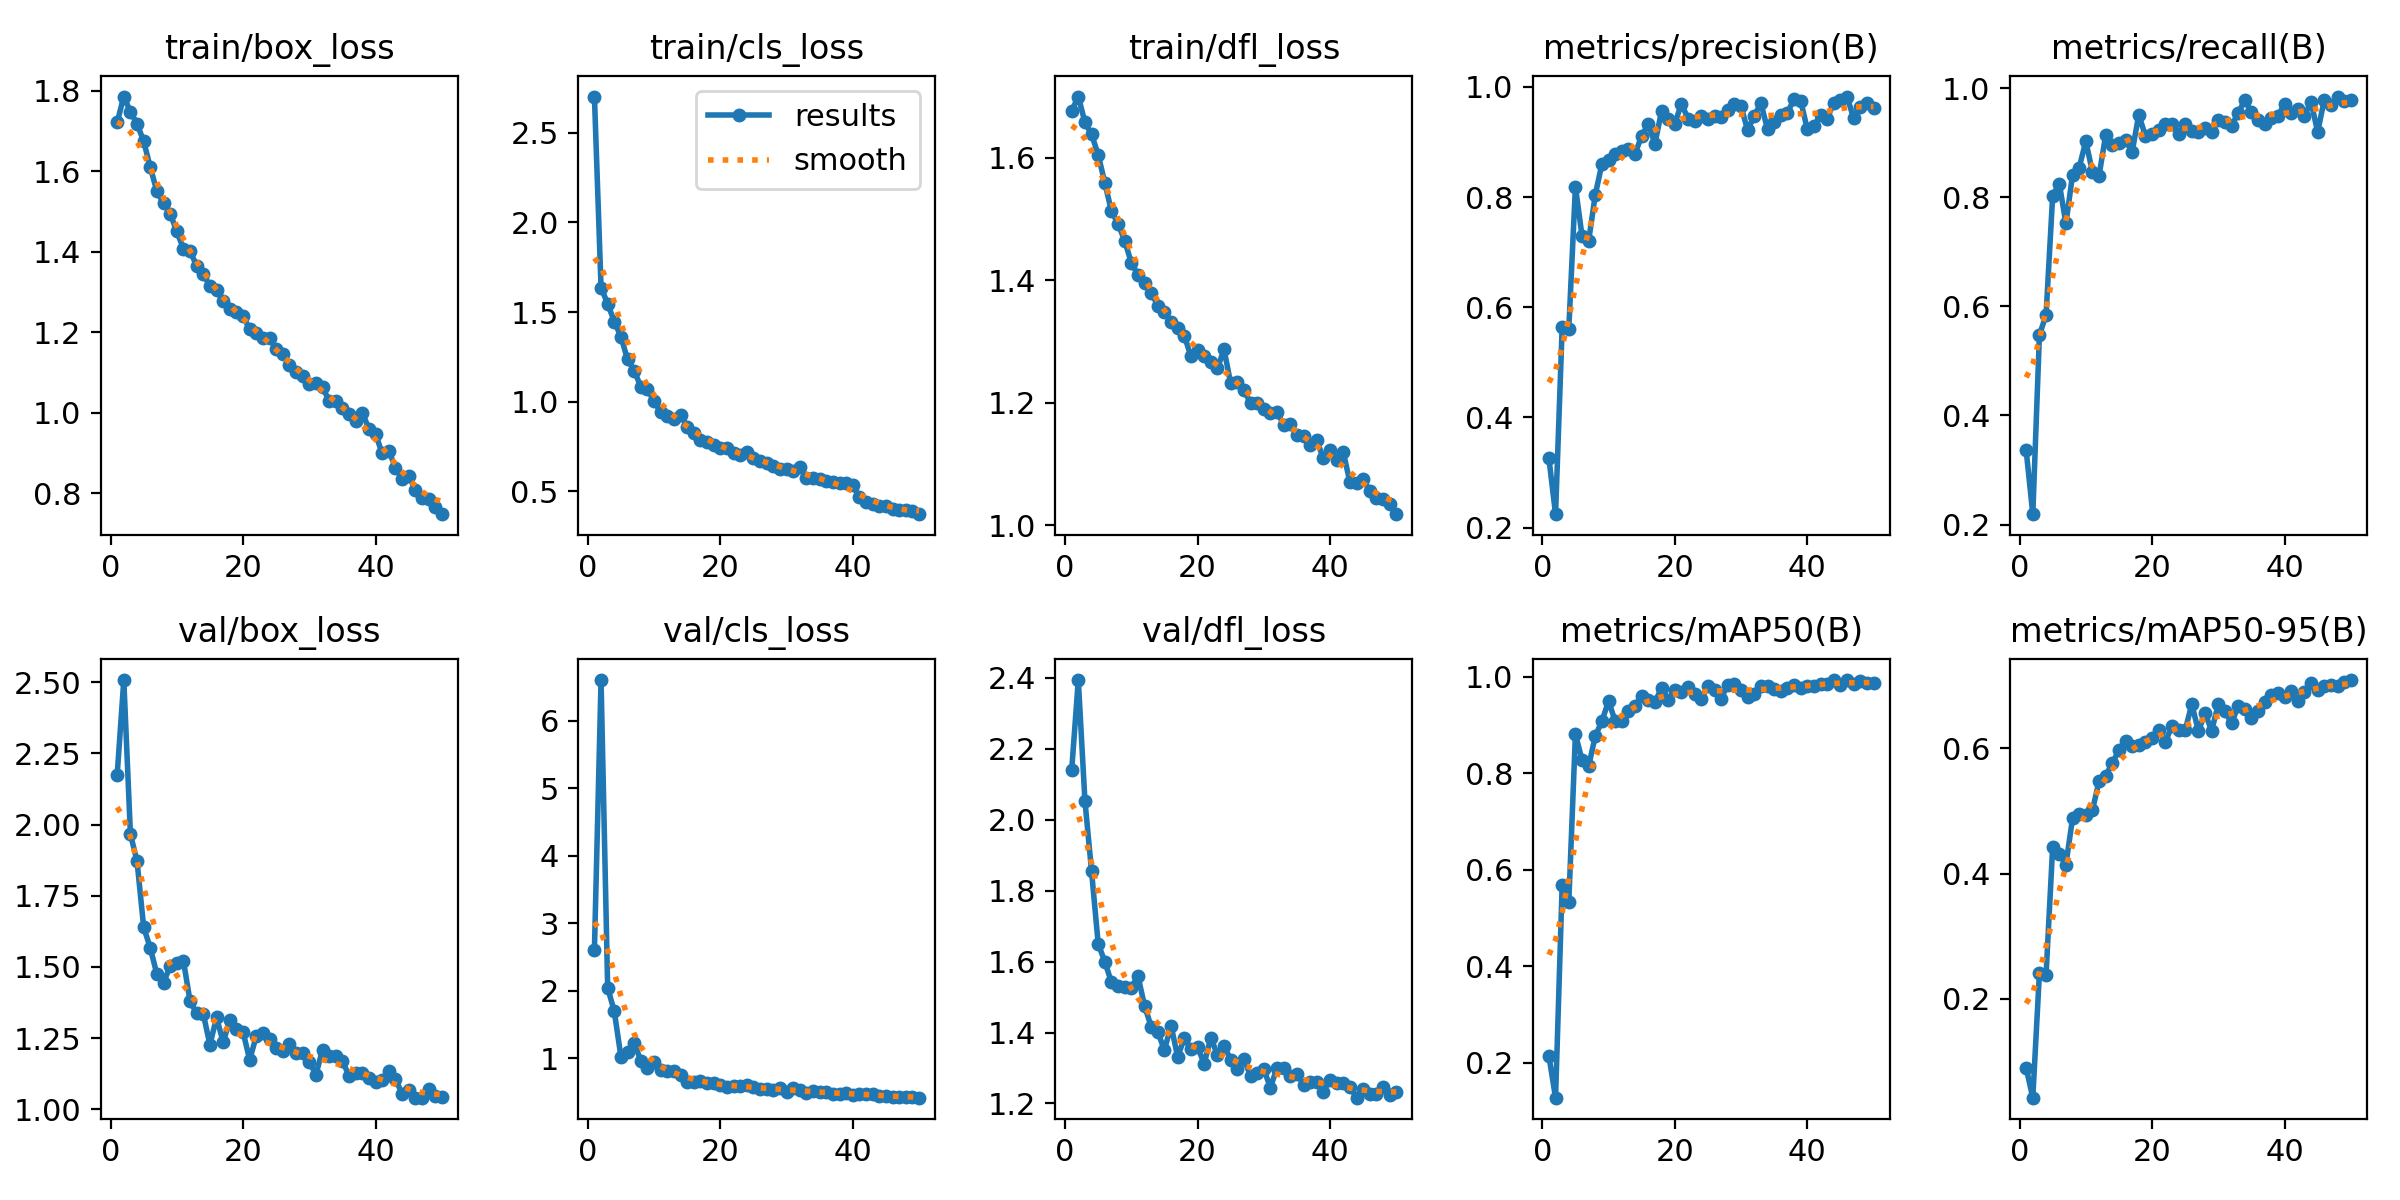

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


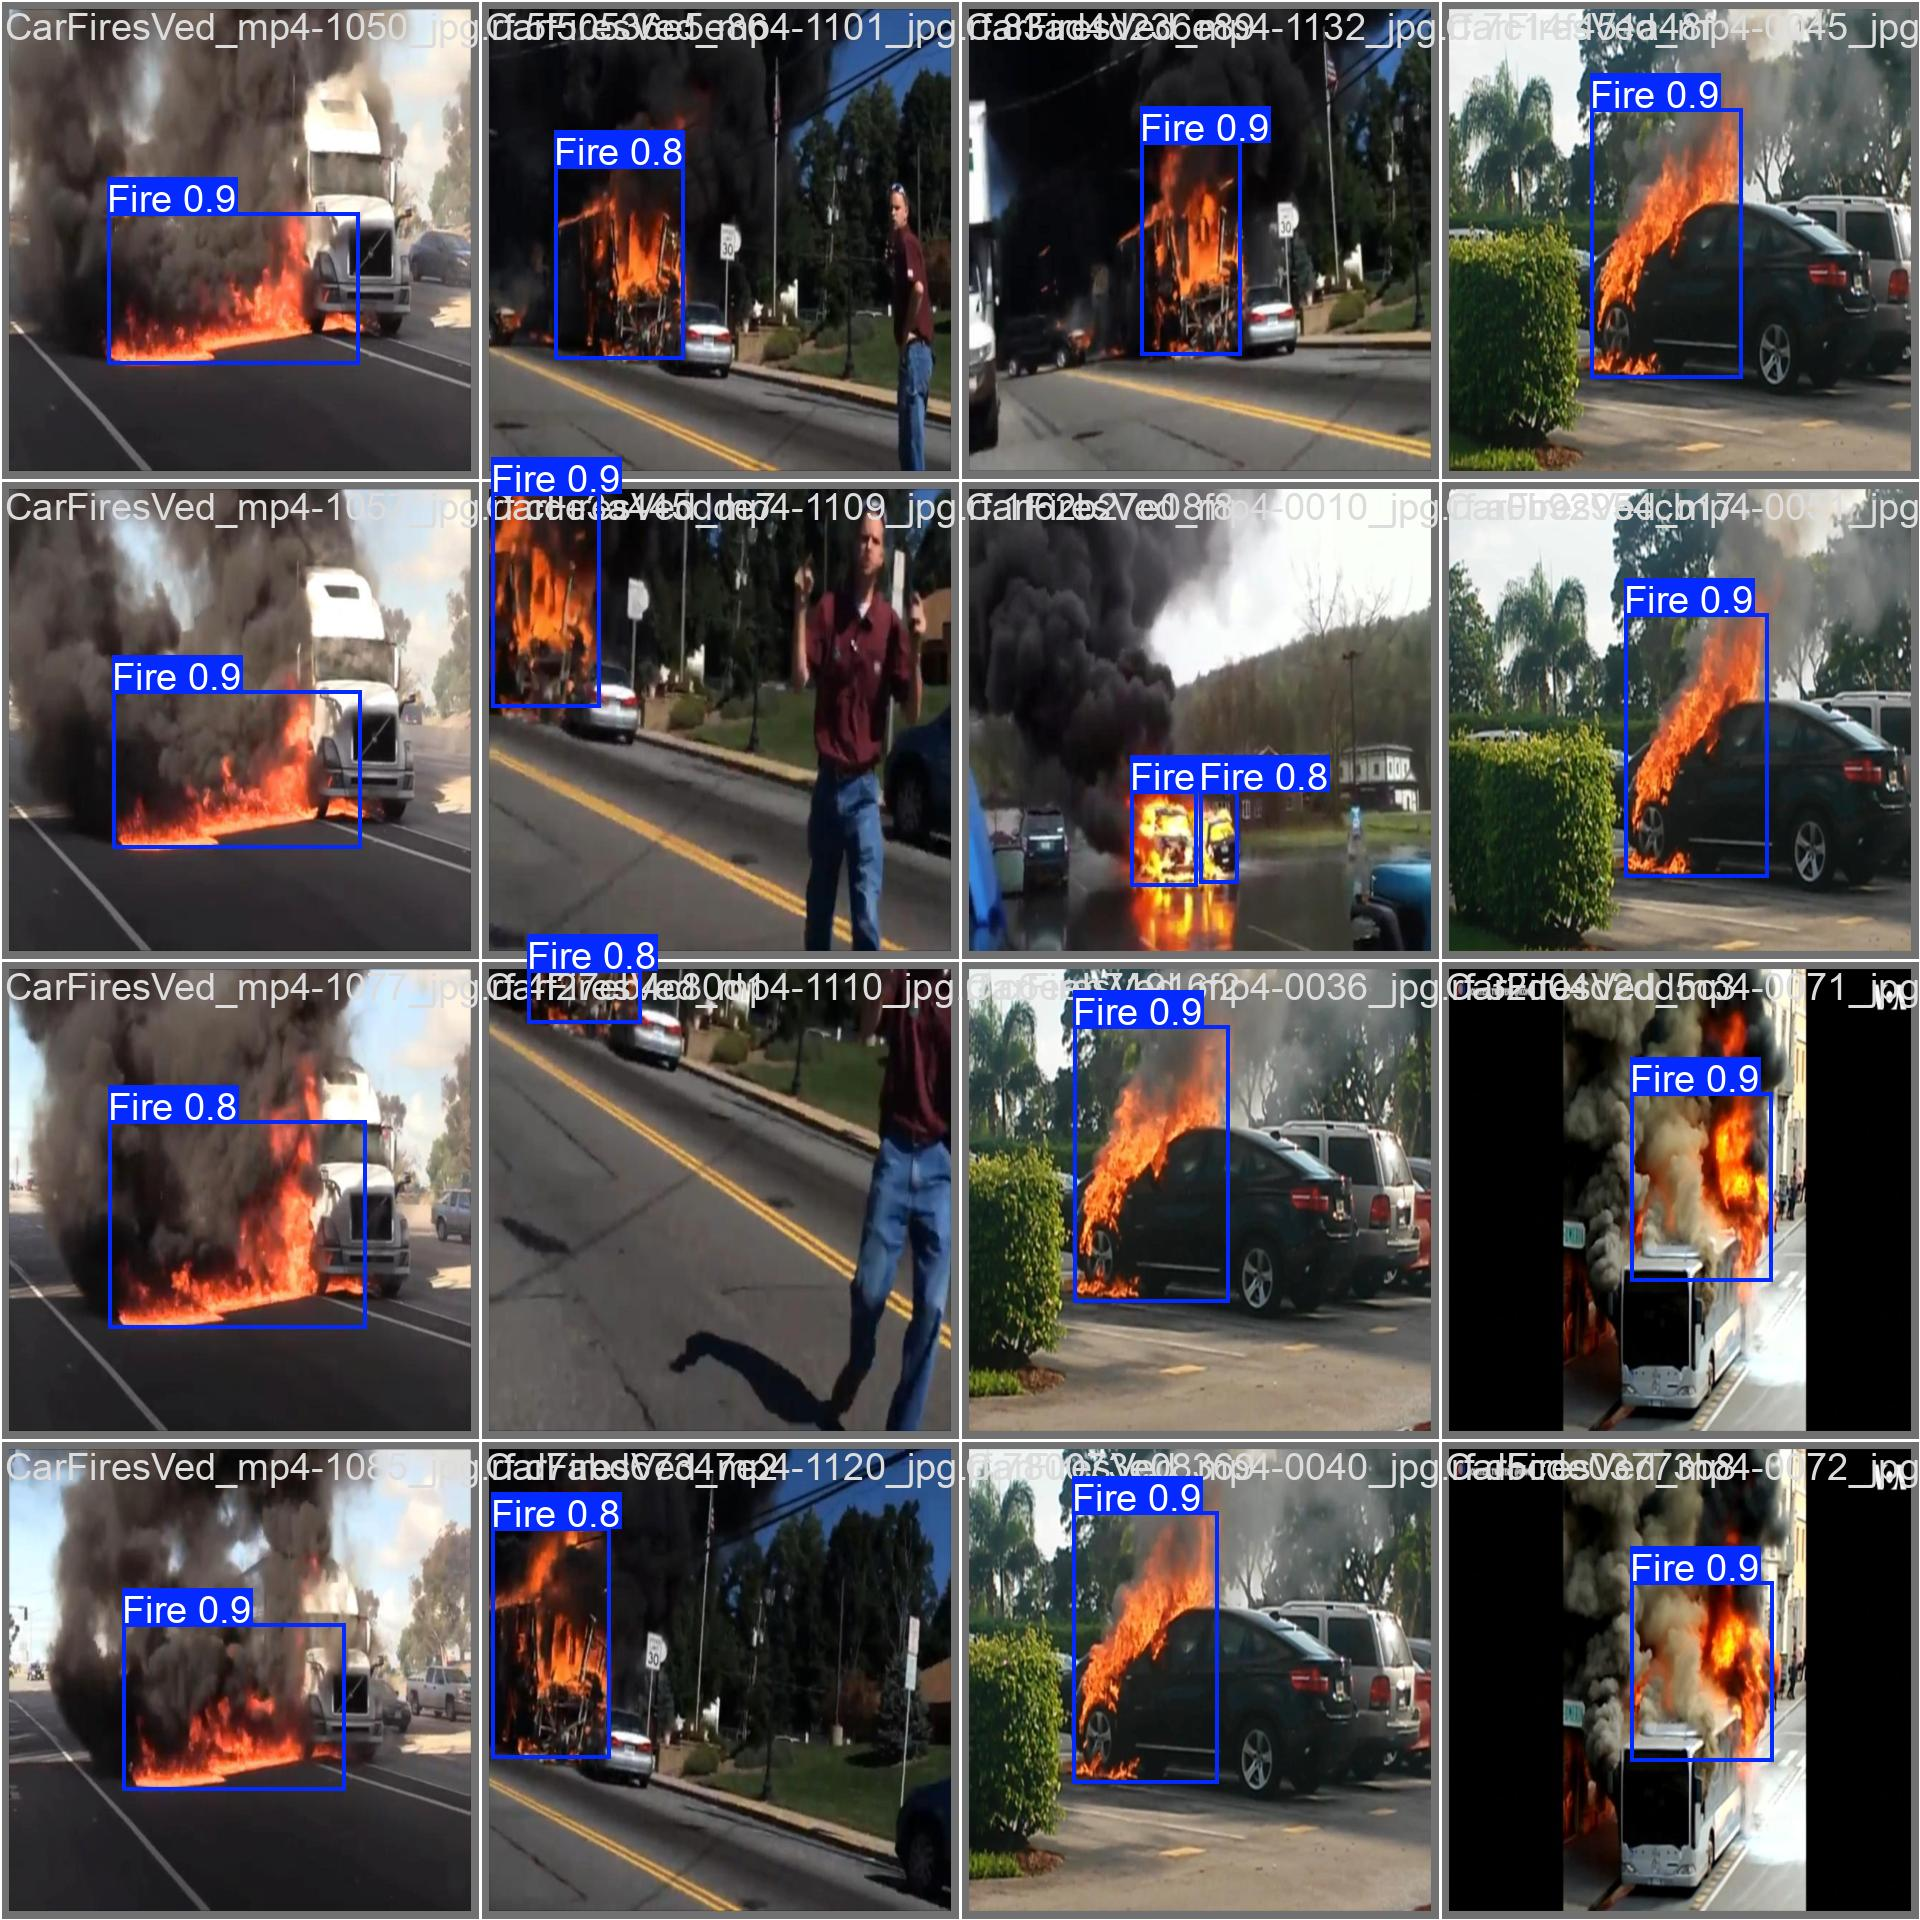

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Fire-Detection-1/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100% 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:02<00:00,  2.80it/s]
                   all        105        137      0.954      0.971      0.986      0.709
Speed: 3.1ms preprocess, 3.2ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/106 /content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0009_jpg.rf.9641b724f5ca5cc233493e7412000109.jpg: 800x800 2 Fires, 8.5ms
image 2/106 /content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0023_jpg.rf.fd13e5756b220a7172ba8d5e318d340a.jpg: 800x800 2 Fires, 7.8ms
image 3/106 /content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0030_jpg.rf.e4ded6f09202972d0f1291a997e6be8d.jpg: 800x800 2 Fires, 7.2ms
image 4/106 /content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0032_jpg.rf.958112eb21ffa2bb7b30ef565b554128.jpg: 800x800 2 Fires, 7.3ms
image 5/106 /content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0034_jpg.rf.8f5b88c348e706daadff902bea455aad.jpg: 800x800 2 Fires, 7.3ms
image 6/106 /content/datasets/Fire-Detection-1/test/images/CarFire

In [15]:
image_path = "/content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0009_jpg.rf.9641b724f5ca5cc233493e7412000109.jpg"



image 1/1 /content/datasets/Fire-Detection-1/test/images/CarFiresVed_mp4-0009_jpg.rf.9641b724f5ca5cc233493e7412000109.jpg: 800x800 2 Fires, 7.3ms
Speed: 3.8ms preprocess, 7.3ms inference, 2.1ms postprocess per image at shape (1, 3, 800, 800)


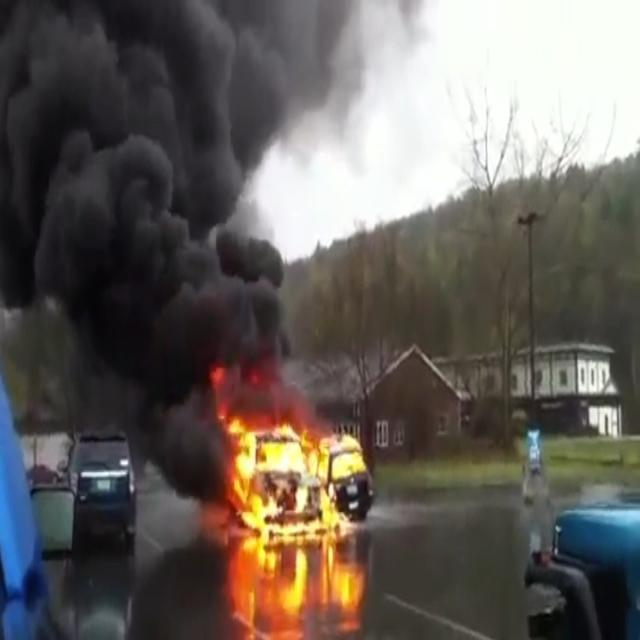

In [17]:

from ultralytics import YOLO
from IPython.display import display, Image

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

results = model(image_path)

for result in results:
    result.plot()

display(Image(filename=image_path, width=600))


In [ ]:
!ls /content/datasets/Gujarat-7/test/images/


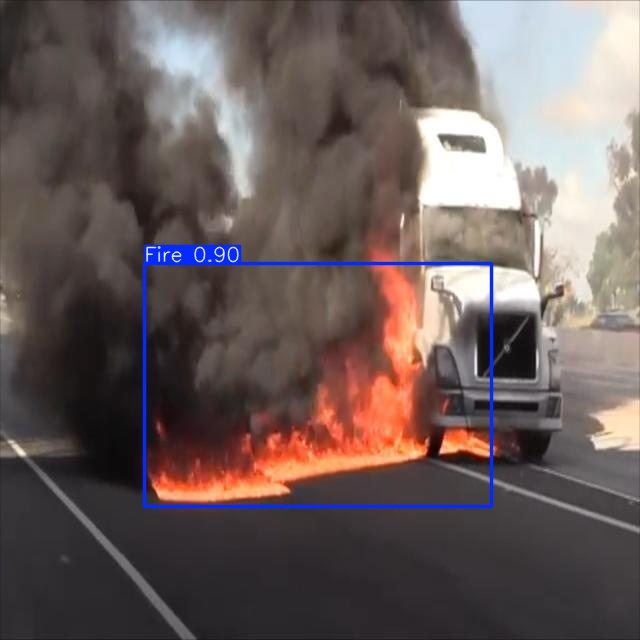

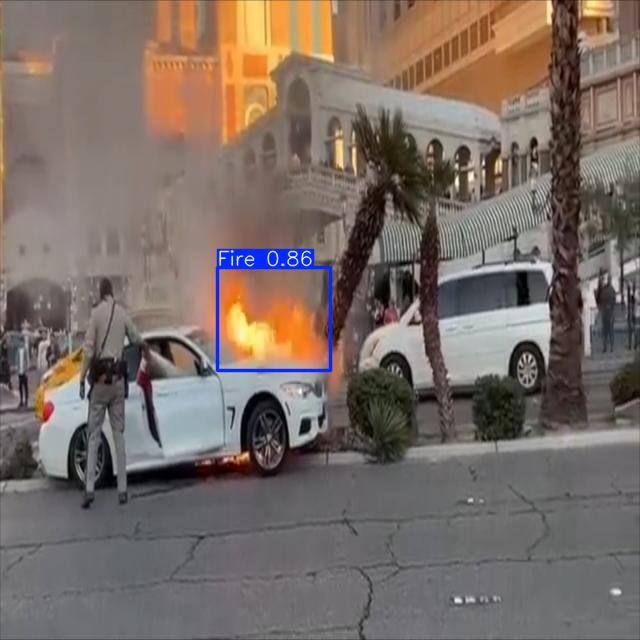

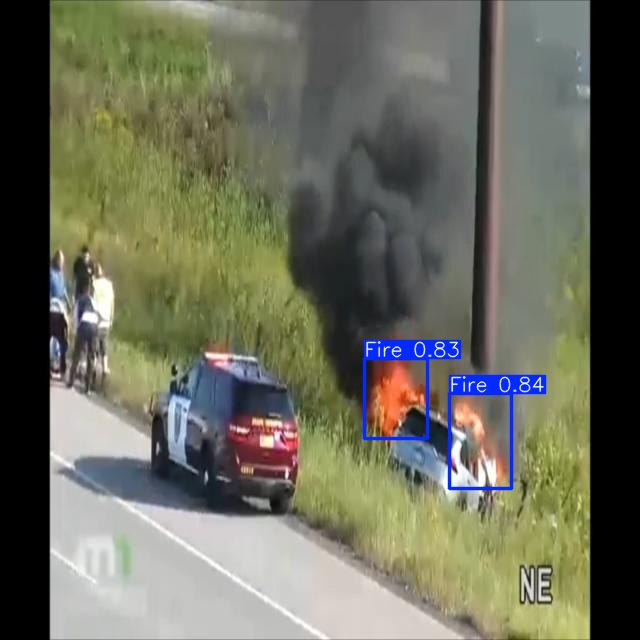

In [18]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [19]:
from ultralytics import YOLO
import os

model_path = os.path.join(os.getcwd(), 'best_local.pt')

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

model.save(model_path)

print(f"done with saving the model: {model_path}")


done with saving the model: /content/best_local.pt
